For more football coding tutorials, follow the **Python Football Review** on [Substack](https://substack.com/@martinondata), or visit [PythonFootball.com](https://www.pythonfootball.com)

---



In [1]:
!pip install soccerdata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 131.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.0/512.0 kB 35.7 MB/s eta 0:00:00
  Created wheel for undetected-chromedriver: filename=undetected_chromedriver-3.5.5-py3-none-any.whl size=47047 sha256=f426526f61747abd4ffbd7f93b5a1cea4328a73f55138095c47b5e644e538ec3
  Stored in directory: /root/.cache/pip/wheels/c4/f1/aa/9de6cf276210554d91e9c0526864563e850a428c5e76da4914
Successfully built undetected-chromed

In [1]:
import polars as pl
import soccerdata as sd
import matplotlib.pyplot as plt
import pandas as pd

[12/04/25 12:20:01] INFO     No custom team name replacements found. You can configure these in       ]8;id=491030;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=945493;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_config.py#91\91]8;;\
                             /root/soccerdata/config/teamname_replacements.json.                                   

                    INFO     No custom league dict found. You can configure additional leagues in    ]8;id=576303;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=254977;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_config.py#197\197]8;;\
                             /root/soccerdata/config/league_dict.json.                                             

# Collect data

This could take up to an hour. Reduce perimeter if necessary.

In [ ]:
leagues = ['ENG-Premier League', 'ESP-La Liga', 'FRA-Ligue 1',
           'GER-Bundesliga', 'ITA-Serie A']

seasons = ['2014/2015', '2015/2016', '2016/2017', '2017/2018',
           '2018/2019', '2019/2020', '2020/2021', '2021/2022',
           '2022/2023', '2023/2024', '2024/2025']

In [5]:
understat = sd.Understat(leagues = leagues,
                         seasons = seasons)

df = understat.read_shot_events()
df = pl.from_pandas(df, include_index = True)
df.head()

[12/04/25 12:21:20] INFO     Saving cached data to /root/soccerdata/data/Understat                   ]8;id=624699;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=107265;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_common.py#263\263]8;;\

league,season,game,team,player,league_id,season_id,game_id,date,shot_id,team_id,player_id,assist_player_id,assist_player,xg,location_x,location_y,minute,body_part,situation,result
str,str,str,str,str,str,i64,i64,datetime[ns],i64,i64,i64,i64,str,f64,f64,f64,i64,str,str,str
"""ENG-Premier League""","""2526""","""2025-08-15 Liverpool-Bournemou…","""Bournemouth""","""Antoine Semenyo""","""1""",2025,28778,2025-08-15 19:00:00,637503,73,11363,731590,"""Adrien Truffert""",0.316921,0.908,0.444,5,"""Right Foot""","""Open Play""","""Missed Shot"""
"""ENG-Premier League""","""2526""","""2025-08-15 Liverpool-Bournemou…","""Bournemouth""","""Antoine Semenyo""","""1""",2025,28778,2025-08-15 19:00:00,637519,73,11363,731595,"""David Brooks""",0.425994,0.908,0.513,63,"""Left Foot""","""Open Play""","""Goal"""
"""ENG-Premier League""","""2526""","""2025-08-15 Liverpool-Bournemou…","""Bournemouth""","""Antoine Semenyo""","""1""",2025,28778,2025-08-15 19:00:00,637523,73,11363,731599,"""Hamed Junior Traore""",0.09559,0.825,0.483,75,"""Left Foot""","""Open Play""","""Goal"""
"""ENG-Premier League""","""2526""","""2025-08-15 Liverpool-Bournemou…","""Bournemouth""","""David Brooks""","""1""",2025,28778,2025-08-15 19:00:00,637509,73,6820,null,null,0.03863,0.855,0.685,41,"""Right Foot""","""Open Play""","""Blocked Shot"""
"""ENG-Premier League""","""2526""","""2025-08-15 Liverpool-Bournemou…","""Bournemouth""","""David Brooks""","""1""",2025,28778,2025-08-15 19:00:00,637521,73,6820,731594,"""Marcus Tavernier""",0.077091,0.896,0.63,70,"""Left Foot""","""Open Play""","""Blocked Shot"""


# Create features

In [6]:
shot_events = (
    df
    .select("league", "season", "game", "team", "player", "season_id", "date",
            "shot_id", "xg", "location_x", "location_y", "minute", "body_part",
            "situation", "result")
    .filter(pl.col("situation") == "Open Play")
    .with_columns(
        (pl.when(pl.col("result") == "Goal").then(1).otherwise(0)).alias("is_goal")
    )
    .drop_nulls()
)
shot_events.head(3)

league,season,game,team,player,season_id,date,shot_id,xg,location_x,location_y,minute,body_part,situation,result,is_goal
str,str,str,str,str,i64,datetime[ns],i64,f64,f64,f64,i64,str,str,str,i32
"""ENG-Premier League""","""2526""","""2025-08-15 Liverpool-Bournemou…","""Bournemouth""","""Antoine Semenyo""",2025,2025-08-15 19:00:00,637503,0.316921,0.908,0.444,5,"""Right Foot""","""Open Play""","""Missed Shot""",0
"""ENG-Premier League""","""2526""","""2025-08-15 Liverpool-Bournemou…","""Bournemouth""","""Antoine Semenyo""",2025,2025-08-15 19:00:00,637519,0.425994,0.908,0.513,63,"""Left Foot""","""Open Play""","""Goal""",1
"""ENG-Premier League""","""2526""","""2025-08-15 Liverpool-Bournemou…","""Bournemouth""","""Antoine Semenyo""",2025,2025-08-15 19:00:00,637523,0.09559,0.825,0.483,75,"""Left Foot""","""Open Play""","""Goal""",1


In [ ]:
pitch_length = 105
pitch_width = 68

box_depth = 16.5
box_half_width = 40.32 / 2   # = 20.16m

df = (
    shot_events
    # Compute real distances in meters
    .with_columns([
        # Euclidean distance in meters to centre of goal
        (
            (pitch_length * (1 - pl.col("location_x")))**2 +
            (pitch_width * (0.5 - pl.col("location_y")) )**2
        ).sqrt().alias("distance_meters"),

        # Convert Understat coords to meters (for box classification)
        (pitch_length * (1 - pl.col("location_x"))).alias("x_m"),
        (pitch_width * (0.5 - pl.col("location_y"))).alias("y_m"),
    ])
    # Outside-the-box dummy (rectangular penalty area)
    .with_columns(
        (
            (pl.col("x_m") > box_depth) |
            (pl.col("y_m").abs() > box_half_width)
        ).cast(pl.Int8).alias("is_outside_box")
    )
    # Screamer dummy (25m)
    .with_columns(
        (pl.col("distance_meters") >= 25).cast(pl.Int8).alias("is_outside_25m")
    )
    .select("league", "season",	"game",	"team",	"player", "season_id", "date", "shot_id",
            "xg", "minute",	"body_part", "result", "is_goal", "distance_meters", "is_outside_box", "is_outside_25m")
)

df.head(3)


league,season,game,team,player,season_id,date,shot_id,xg,minute,body_part,result,is_goal,distance_meters,is_outside_box,is_outside_25m
str,str,str,str,str,i64,datetime[ns],i64,f64,i64,str,str,i32,f64,i8,i8
"""ENG-Premier League""","""2014/2015""","""2014-08-16 Arsenal-Crystal Pal…","""Arsenal""","""Aaron Ramsey""",2014,2014-08-16 17:30:00,14424,0.050824,8,"""Right Foot""","""Blocked Shot""",0,20.608769,1,0
"""ENG-Premier League""","""2014/2015""","""2014-08-16 Arsenal-Crystal Pal…","""Arsenal""","""Aaron Ramsey""",2014,2014-08-16 17:30:00,14432,0.020642,38,"""Right Foot""","""Blocked Shot""",0,26.730184,1,1
"""ENG-Premier League""","""2014/2015""","""2014-08-16 Arsenal-Crystal Pal…","""Arsenal""","""Aaron Ramsey""",2014,2014-08-16 17:30:00,14438,0.019741,70,"""Right Foot""","""Saved Shot""",0,26.539976,1,1


# Total shots

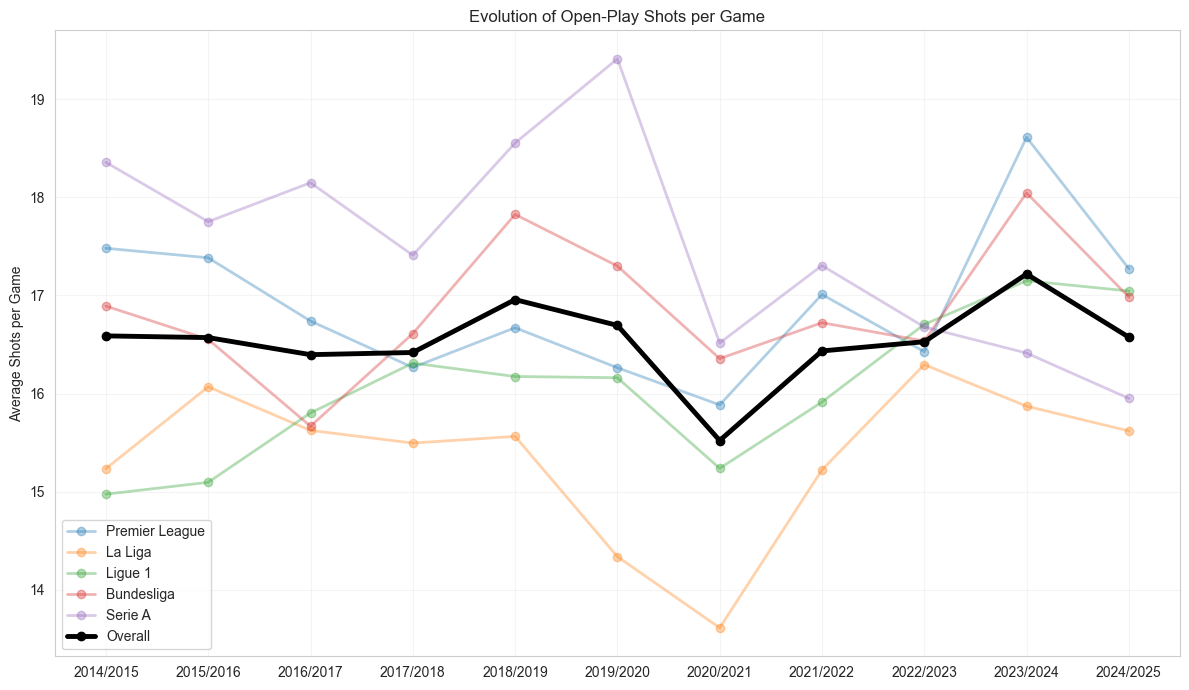

In [ ]:
# --------------------------------------------------
# 1. Count shots
# --------------------------------------------------
df_counts = (
    df
    .group_by(["league", "season"])
    .agg([
        pl.len().alias("num_shots"),
        pl.col("game").n_unique().alias("num_games"),
    ])
    .with_columns(
        (pl.col("num_shots") / pl.col("num_games")).alias("shots_per_game")
    )
    .sort(["season", "league"])
)

# --------------------------------------------------
# 2. Overall trend
# --------------------------------------------------
df_overall = (
    df_counts
    .group_by("season")
    .agg(pl.col("shots_per_game").mean().alias("overall_avg"))
    .sort("season")
)

# Convert to pandas for plotting
pdf = df_counts.to_pandas()
pdf_overall = df_overall.to_pandas()

# --------------------------------------------------
# 3. Plot
# --------------------------------------------------
plt.figure(figsize=(12, 7))

leagues = pdf["league"].unique()

alpha_league = 0.35
linewidth_league = 2.0

for league in leagues:
    subset = pdf[pdf["league"] == league]
    plt.plot(
        subset["season"],
        subset["shots_per_game"],
        marker="o",
        linewidth=linewidth_league,
        alpha=alpha_league,
        label=league.replace("ENG-", "").replace("ESP-", "")
                     .replace("FRA-", "").replace("GER-", "").replace("ITA-", "")
    )

# Bold black overall trend
plt.plot(
    pdf_overall["season"],
    pdf_overall["overall_avg"],
    color="black",
    linewidth=3.5,
    marker="o",
    label="Overall"
)

# Styling
plt.ylabel("Average Shots per Game")
plt.title("Evolution of Open-Play Shots per Game")
plt.grid(alpha=0.2)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
pdf_overall

,season,overall_avg
0,2014/2015,16.587905
1,2015/2016,16.570458
2,2016/2017,16.396387
3,2017/2018,16.418538
4,2018/2019,16.957991
5,2019/2020,16.695020
6,2020/2021,15.520716
7,2021/2022,16.434444
8,2022/2023,16.528242
9,2023/2024,17.218689


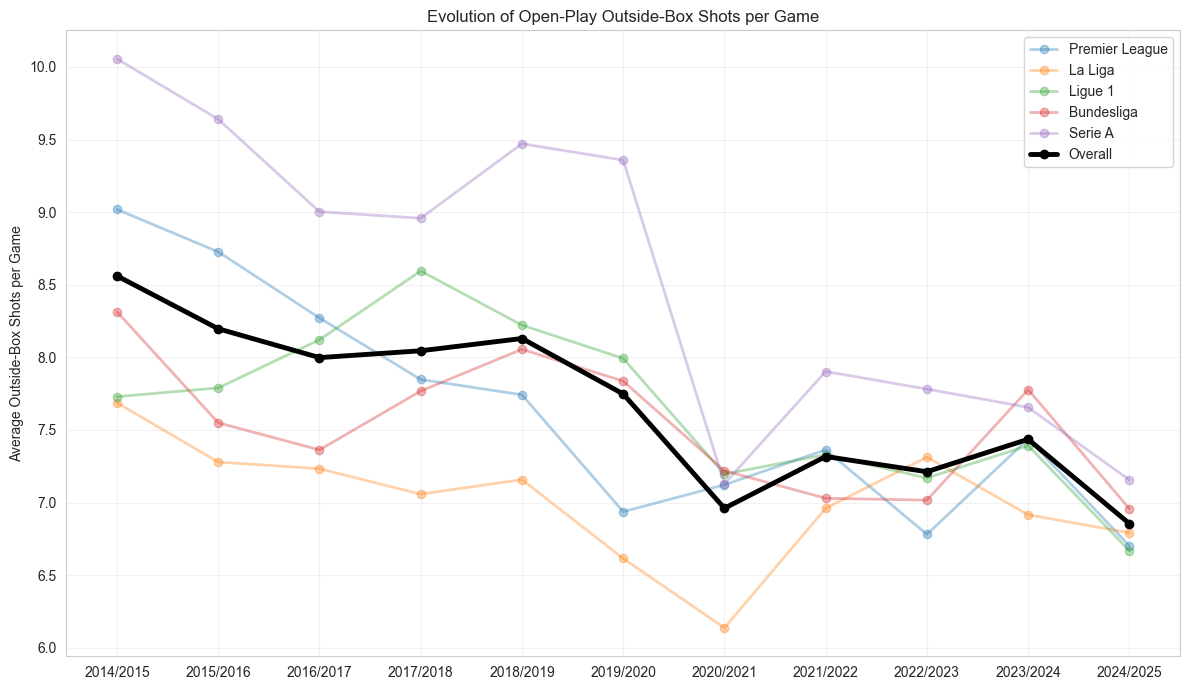

In [ ]:
# --------------------------------------------------
# 1. Filter: outside-box shots only
# --------------------------------------------------
df_ob = df.filter(pl.col("is_outside_box") == 1)

# --------------------------------------------------
# 2. Per league × season count shots
# --------------------------------------------------
df_counts_ob = (
    df_ob
    .group_by(["league", "season"])
    .agg([
        pl.len().alias("num_shots_ob"),
        pl.col("game").n_unique().alias("num_games"),
    ])
    .with_columns(
        (pl.col("num_shots_ob") / pl.col("num_games")).alias("shots_ob_per_game")
    )
    .sort(["season", "league"])
)

# --------------------------------------------------
# 3. Overall trend
# --------------------------------------------------
df_overall_ob = (
    df_counts_ob
    .group_by("season")
    .agg(pl.col("shots_ob_per_game").mean().alias("overall_avg"))
    .sort("season")
)

# Convert for plotting
pdf = df_counts_ob.to_pandas()
pdf_overall = df_overall_ob.to_pandas()

# --------------------------------------------------
# 4. Plot
# --------------------------------------------------
plt.figure(figsize=(12, 7))

leagues = pdf["league"].unique()
alpha_league = 0.35
linewidth_league = 2.0

for league in leagues:
    subset = pdf[pdf["league"] == league]
    plt.plot(
        subset["season"],
        subset["shots_ob_per_game"],
        marker="o",
        linewidth=linewidth_league,
        alpha=alpha_league,
        label=league.replace("ENG-", "").replace("ESP-", "")
                     .replace("FRA-", "").replace("GER-", "").replace("ITA-", "")
    )

# Bold black overall line
plt.plot(
    pdf_overall["season"],
    pdf_overall["overall_avg"],
    color="black",
    linewidth=3.5,
    marker="o",
    label="Overall"
)

# Styling
plt.ylabel("Average Outside-Box Shots per Game")
plt.title("Evolution of Open-Play Outside-Box Shots per Game")
plt.grid(alpha=0.25)
plt.legend()
plt.tight_layout()

plt.show()


In [ ]:
pdf_overall

,season,overall_avg
0,2014/2015,8.560669
1,2015/2016,8.196646
2,2016/2017,7.998121
3,2017/2018,8.045174
4,2018/2019,8.129649
5,2019/2020,7.747682
6,2020/2021,6.960578
7,2021/2022,7.317057
8,2022/2023,7.212210
9,2023/2024,7.435796


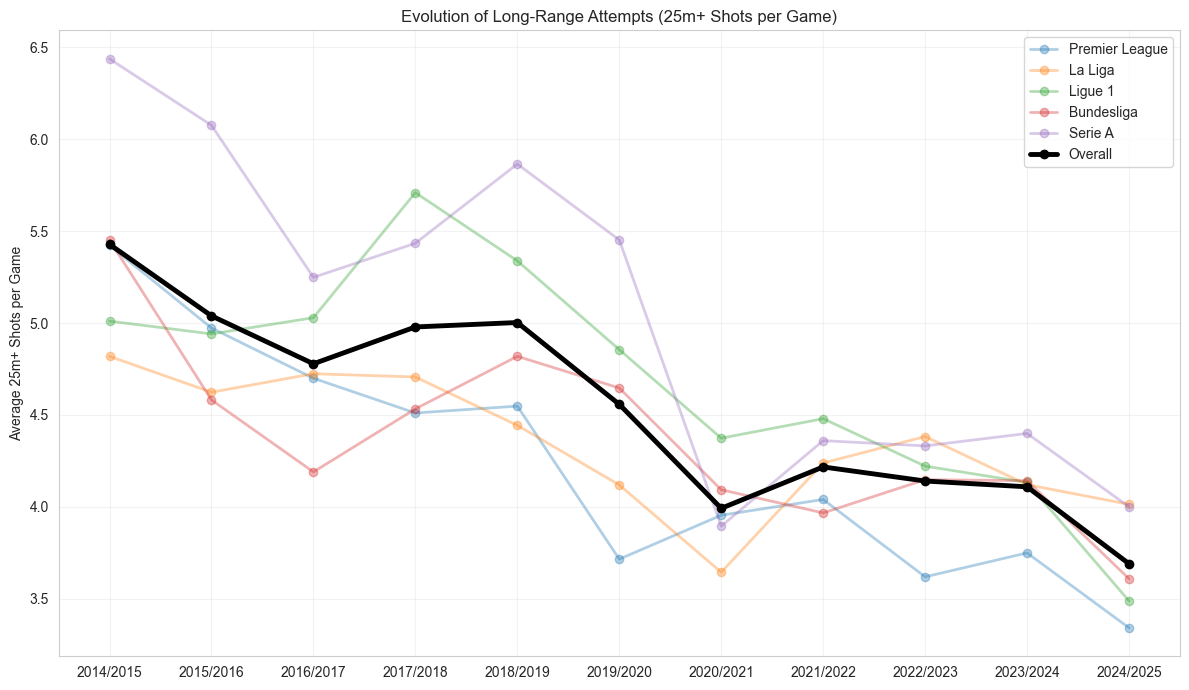

In [ ]:
# --------------------------------------------------
# 1. Filter shots from 25 meters or more
# --------------------------------------------------
df_25 = df.filter(pl.col("is_outside_25m") == 1)

# --------------------------------------------------
# 2. Per league × season count shots
# --------------------------------------------------
df_counts_25 = (
    df_25
    .group_by(["league", "season"])
    .agg([
        pl.len().alias("num_shots_25m"),
        pl.col("game").n_unique().alias("num_games")
    ])
    .with_columns(
        (pl.col("num_shots_25m") / pl.col("num_games")).alias("shots_25m_per_game")
    )
    .sort(["season", "league"])
)

# --------------------------------------------------
# 3. Overall trend
# --------------------------------------------------
df_overall_25 = (
    df_counts_25
    .group_by("season")
    .agg(pl.col("shots_25m_per_game").mean().alias("overall_avg"))
    .sort("season")
)

# Convert to pandas
pdf = df_counts_25.to_pandas()
pdf_overall = df_overall_25.to_pandas()

# --------------------------------------------------
# 4. Plot
# --------------------------------------------------
plt.figure(figsize=(12, 7))

leagues = pdf["league"].unique()
alpha_league = 0.35
linewidth_league = 2.0

for league in leagues:
    subset = pdf[pdf["league"] == league]
    plt.plot(
        subset["season"],
        subset["shots_25m_per_game"],
        marker="o",
        linewidth=linewidth_league,
        alpha=alpha_league,
        label=league.replace("ENG-", "").replace("ESP-", "")
                     .replace("FRA-", "").replace("GER-", "").replace("ITA-", "")
    )

# Bold black overall trend
plt.plot(
    pdf_overall["season"],
    pdf_overall["overall_avg"],
    color="black",
    linewidth=3.5,
    marker="o",
    label="Overall"
)

# Styling
plt.ylabel("Average 25m+ Shots per Game")
plt.title("Evolution of Long-Range Attempts (25m+ Shots per Game)")
plt.grid(alpha=0.25)
plt.legend()
plt.tight_layout()

plt.show()


In [ ]:
pdf_overall

,season,overall_avg
0,2014/2015,5.428337
1,2015/2016,5.039238
2,2016/2017,4.778382
3,2017/2018,4.978835
4,2018/2019,5.002980
5,2019/2020,4.557866
6,2020/2021,3.991976
7,2021/2022,4.217120
8,2022/2023,4.140541
9,2023/2024,4.108940


# Distance

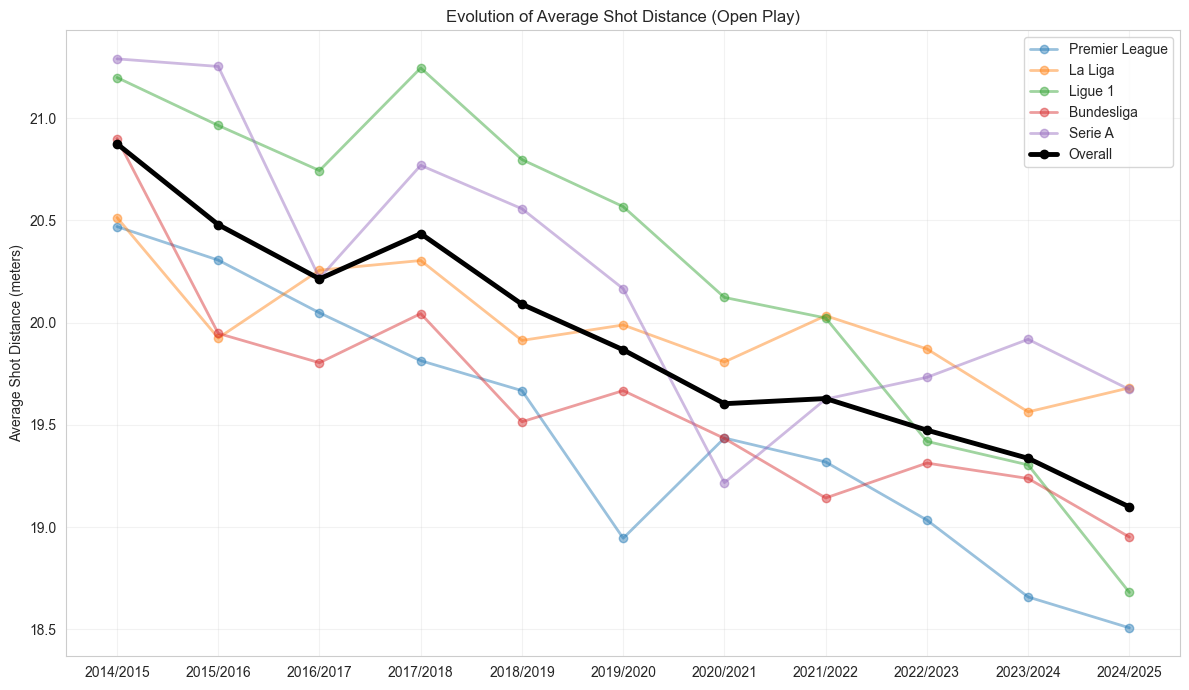

In [ ]:
# --------------------------------------------------
# 1. Average shot distance per league per season
# --------------------------------------------------
df_avgdist = (
    df
    .group_by(["league", "season"])
    .agg(pl.col("distance_meters").mean().alias("avg_distance"))
    .sort(["season", "league"])
)

# --------------------------------------------------
# 2. Overall trend
# --------------------------------------------------
df_overall_avgdist = (
    df_avgdist
    .group_by("season")
    .agg(pl.col("avg_distance").mean().alias("overall_avg"))
    .sort("season")
)

# Convert for plotting
pdf = df_avgdist.to_pandas()
pdf_overall = df_overall_avgdist.to_pandas()

# --------------------------------------------------
# 3. Plot
# --------------------------------------------------
plt.figure(figsize=(12, 7))

leagues = pdf["league"].unique()
alpha_league = 0.45
linewidth_league = 2.0

for league in leagues:
    subset = pdf[pdf["league"] == league]
    plt.plot(
        subset["season"],
        subset["avg_distance"],
        marker="o",
        linewidth=linewidth_league,
        alpha=alpha_league,
        label=league.replace("ENG-", "").replace("ESP-", "").replace("FRA-", "")
                    .replace("GER-", "").replace("ITA-", "")
    )

# Bold black overall trend
plt.plot(
    pdf_overall["season"],
    pdf_overall["overall_avg"],
    color="black",
    linewidth=3.5,
    marker="o",
    label="Overall"
)

# Styling
plt.ylabel("Average Shot Distance (meters)")
plt.title("Evolution of Average Shot Distance (Open Play)")
plt.grid(alpha=0.25)
plt.legend()
plt.tight_layout()

plt.show()


In [ ]:
pdf_overall

,season,overall_avg
0,2014/2015,20.874878
1,2015/2016,20.479213
2,2016/2017,20.214017
3,2017/2018,20.435468
4,2018/2019,20.089964
5,2019/2020,19.866850
6,2020/2021,19.603305
7,2021/2022,19.628539
8,2022/2023,19.473823
9,2023/2024,19.336053


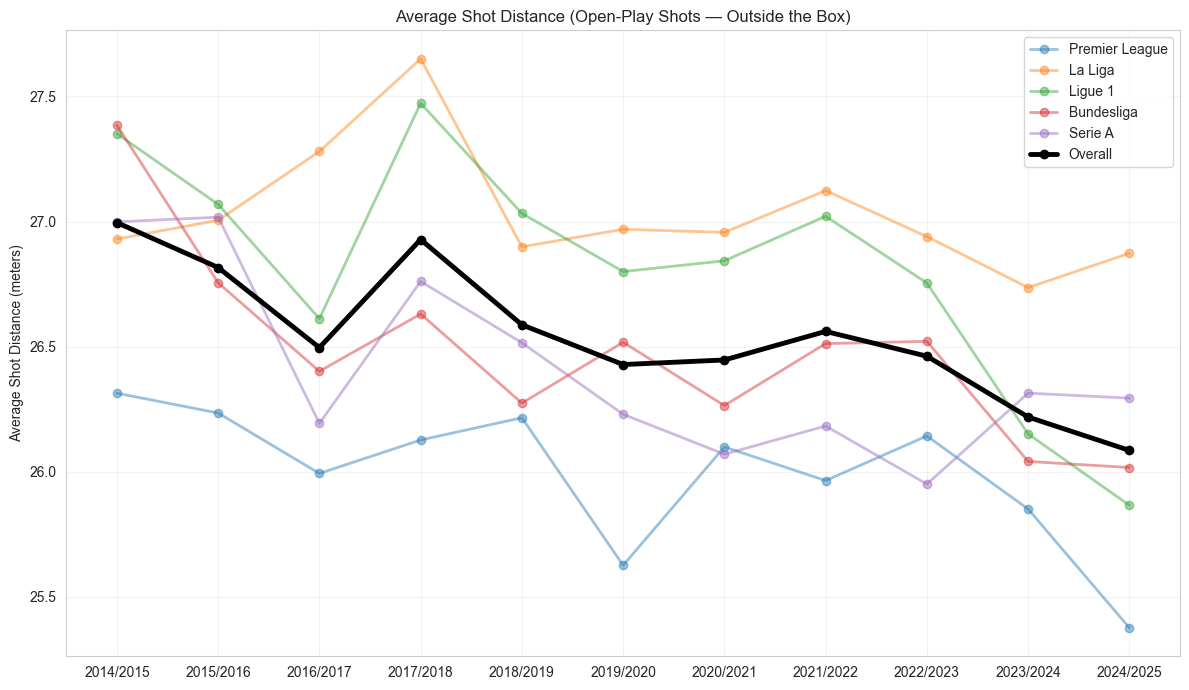

In [ ]:
# --------------------------------------------------
# 1. Filter to outside-box shots
# --------------------------------------------------
df_ob = df.filter(pl.col("is_outside_box") == 1)

# --------------------------------------------------
# 2. Average distance per league × season
# --------------------------------------------------
df_avgdist_ob = (
    df_ob
    .group_by(["league", "season"])
    .agg(pl.col("distance_meters").mean().alias("avg_distance_ob"))
    .sort(["season", "league"])
)

# --------------------------------------------------
# 3. Overall trend
# --------------------------------------------------
df_overall_avgdist_ob = (
    df_avgdist_ob
    .group_by("season")
    .agg(pl.col("avg_distance_ob").mean().alias("overall_avg"))
    .sort("season")
)

# Convert for plotting
pdf = df_avgdist_ob.to_pandas()
pdf_overall = df_overall_avgdist_ob.to_pandas()

# --------------------------------------------------
# 4. Plot
# --------------------------------------------------
plt.figure(figsize=(12, 7))

leagues = pdf["league"].unique()

for league in leagues:
    subset = pdf[pdf["league"] == league]
    plt.plot(
        subset["season"],
        subset["avg_distance_ob"],
        marker="o",
        linewidth=2,
        alpha=0.45,
        label=league.replace("ENG-", "").replace("ESP-", "").replace("FRA-", "")
                     .replace("GER-", "").replace("ITA-", "")
    )

# Overall trend
plt.plot(
    pdf_overall["season"],
    pdf_overall["overall_avg"],
    color="black",
    linewidth=3.5,
    marker="o",
    label="Overall"
)

plt.ylabel("Average Shot Distance (meters)")
plt.title("Average Shot Distance (Open-Play Shots — Outside the Box)")
plt.grid(alpha=0.25)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
pdf_overall

,season,overall_avg
0,2014/2015,26.995854
1,2015/2016,26.816238
2,2016/2017,26.495896
3,2017/2018,26.928231
4,2018/2019,26.587336
5,2019/2020,26.428313
6,2020/2021,26.446647
7,2021/2022,26.560816
8,2022/2023,26.461698
9,2023/2024,26.218482


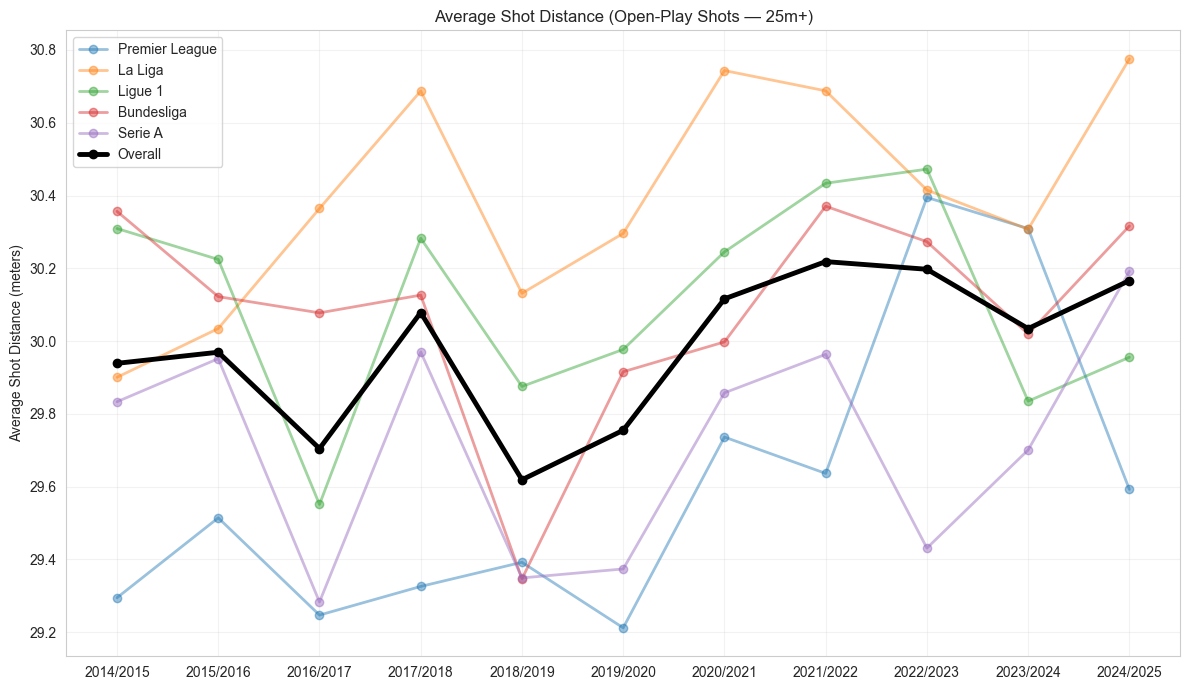

In [ ]:
# --------------------------------------------------
# 1. Filter to 25m+ shots
# --------------------------------------------------
df_25 = df.filter(pl.col("is_outside_25m") == 1)

# --------------------------------------------------
# 2. Average distance
# --------------------------------------------------
df_avgdist_25 = (
    df_25
    .group_by(["league", "season"])
    .agg(pl.col("distance_meters").mean().alias("avg_distance_25m"))
    .sort(["season", "league"])
)

# --------------------------------------------------
# 3. Overall trend
# --------------------------------------------------
df_overall_avgdist_25 = (
    df_avgdist_25
    .group_by("season")
    .agg(pl.col("avg_distance_25m").mean().alias("overall_avg"))
    .sort("season")
)

# Convert for plotting
pdf = df_avgdist_25.to_pandas()
pdf_overall = df_overall_avgdist_25.to_pandas()

# --------------------------------------------------
# 4. Plot
# --------------------------------------------------
plt.figure(figsize=(12, 7))

leagues = pdf["league"].unique()

for league in leagues:
    subset = pdf[pdf["league"] == league]
    plt.plot(
        subset["season"],
        subset["avg_distance_25m"],
        marker="o",
        linewidth=2,
        alpha=0.45,
        label=league.replace("ENG-", "").replace("ESP-", "").replace("FRA-", "")
                     .replace("GER-", "").replace("ITA-", "")
    )

# Overall trend
plt.plot(
    pdf_overall["season"],
    pdf_overall["overall_avg"],
    color="black",
    linewidth=3.5,
    marker="o",
    label="Overall"
)

plt.ylabel("Average Shot Distance (meters)")
plt.title("Average Shot Distance (Open-Play Shots — 25m+)")
plt.grid(alpha=0.25)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
pdf_overall

,season,overall_avg
0,2014/2015,29.938826
1,2015/2016,29.969347
2,2016/2017,29.704551
3,2017/2018,30.078412
4,2018/2019,29.618847
5,2019/2020,29.754846
6,2020/2021,30.116009
7,2021/2022,30.218363
8,2022/2023,30.197306
9,2023/2024,30.034285


# Conversions

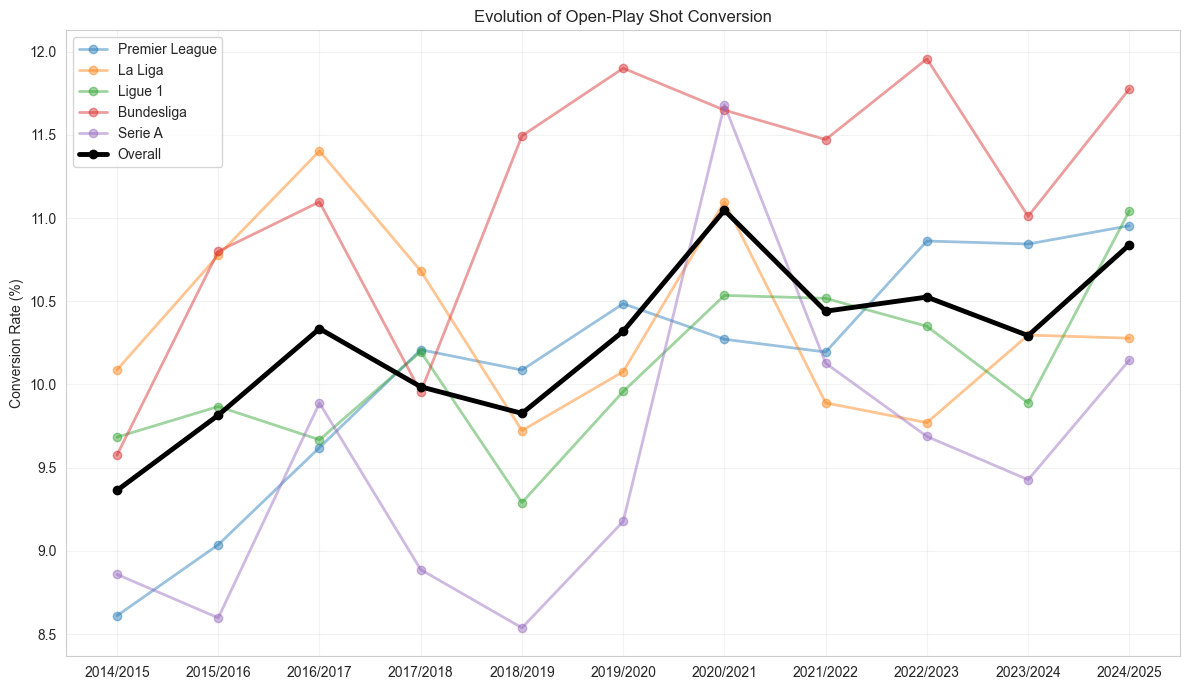

In [ ]:
# --------------------------------------------------
# 1. Conversion rate per league × season
# --------------------------------------------------
df_conv = (
    df
    .group_by(["league", "season"])
    .agg(pl.mean("is_goal").alias("conversion_rate"))
    .sort(["season", "league"])
)

# --------------------------------------------------
# 2. Overall trend
# --------------------------------------------------
df_overall_conv = (
    df_conv
    .group_by("season")
    .agg(pl.col("conversion_rate").mean().alias("overall_avg"))
    .sort("season")
)

# Convert for plotting
pdf = df_conv.to_pandas()
pdf_overall = df_overall_conv.to_pandas()

# --------------------------------------------------
# 3. Plot
# --------------------------------------------------
plt.figure(figsize=(12, 7))

leagues = pdf["league"].unique()

for league in leagues:
    subset = pdf[pdf["league"] == league]
    plt.plot(
        subset["season"],
        subset["conversion_rate"] * 100,
        marker="o",
        linewidth=2,
        alpha=0.45,
        label=league.replace("ENG-", "").replace("ESP-", "")
                     .replace("ITA-", "").replace("FRA-", "").replace("GER-", "")
    )

# Overall trend
plt.plot(
    pdf_overall["season"],
    pdf_overall["overall_avg"] * 100,
    color="black",
    linewidth=3.5,
    marker="o",
    label="Overall"
)

plt.ylabel("Conversion Rate (%)")
plt.title("Evolution of Open-Play Shot Conversion")
plt.grid(alpha=0.25)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
pdf_overall

,season,overall_avg
0,2014/2015,0.093635
1,2015/2016,0.098157
2,2016/2017,0.103355
3,2017/2018,0.099861
4,2018/2019,0.098264
5,2019/2020,0.103196
6,2020/2021,0.110466
7,2021/2022,0.104402
8,2022/2023,0.105253
9,2023/2024,0.102937


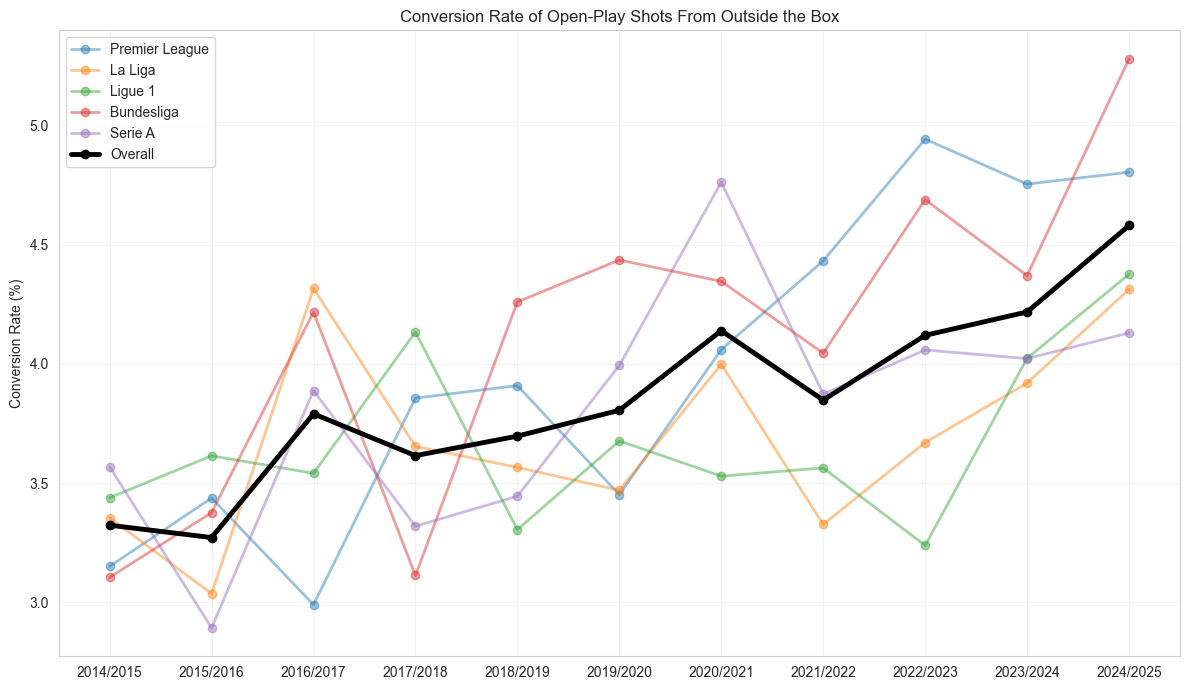

In [ ]:
# --------------------------------------------------
# 1. Filter: outside-box shots
# --------------------------------------------------
df_ob = df.filter(pl.col("is_outside_box") == 1)

# --------------------------------------------------
# 2. Conversion rate per league × season
# --------------------------------------------------
df_conv_ob = (
    df_ob
    .group_by(["league", "season"])
    .agg(pl.mean("is_goal").alias("conversion_ob"))
    .sort(["season", "league"])
)

# --------------------------------------------------
# 3. Overall trend
# --------------------------------------------------
df_overall_conv_ob = (
    df_conv_ob
    .group_by("season")
    .agg(pl.col("conversion_ob").mean().alias("overall_avg"))
    .sort("season")
)

# Convert for plotting
pdf = df_conv_ob.to_pandas()
pdf_overall = df_overall_conv_ob.to_pandas()

# --------------------------------------------------
# 4. Plot
# --------------------------------------------------
plt.figure(figsize=(12, 7))

for league in pdf["league"].unique():
    subset = pdf[pdf["league"] == league]
    plt.plot(
        subset["season"],
        subset["conversion_ob"] * 100,
        marker="o",
        linewidth=2,
        alpha=0.45,
        label=league.replace("ENG-", "").replace("ESP-", "")
                     .replace("ITA-", "").replace("FRA-", "").replace("GER-", "")
    )

plt.plot(
    pdf_overall["season"],
    pdf_overall["overall_avg"] * 100,
    color="black",
    linewidth=3.5,
    marker="o",
    label="Overall"
)

plt.ylabel("Conversion Rate (%)")
plt.title("Conversion Rate of Open-Play Shots From Outside the Box")
plt.grid(alpha=0.25)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
pdf_overall

,season,overall_avg
0,2014/2015,0.033239
1,2015/2016,0.032720
2,2016/2017,0.037905
3,2017/2018,0.036154
4,2018/2019,0.036971
5,2019/2020,0.038056
6,2020/2021,0.041390
7,2021/2022,0.038480
8,2022/2023,0.041195
9,2023/2024,0.042175


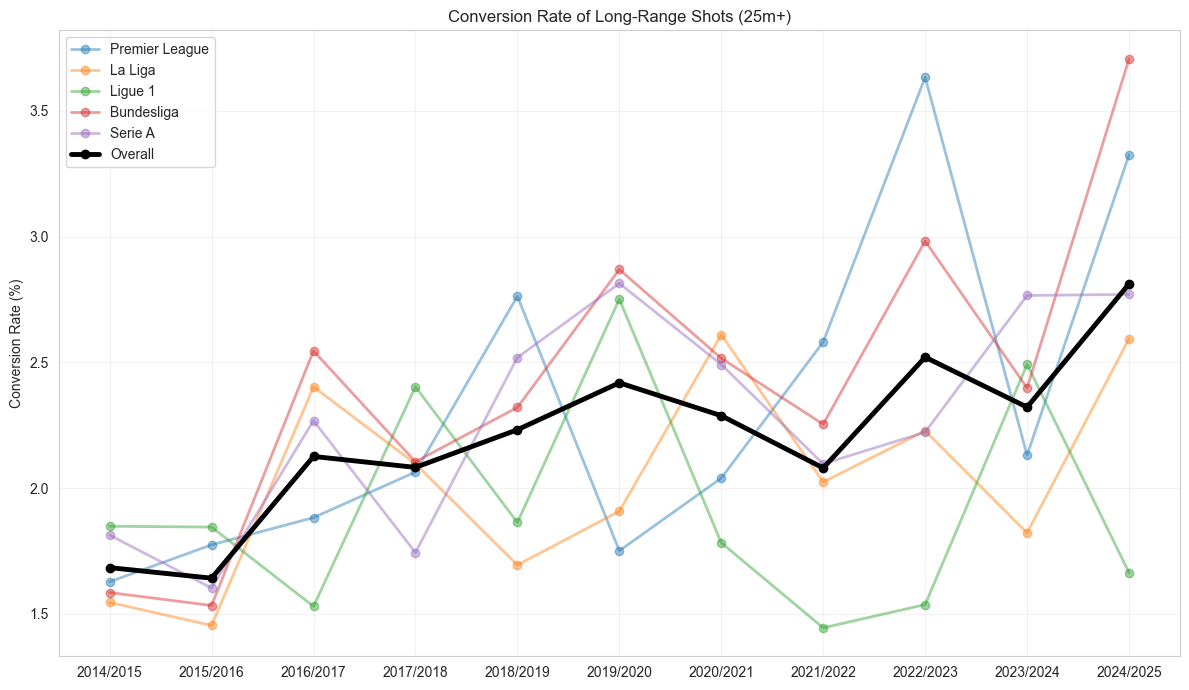

In [ ]:
# --------------------------------------------------
# 1. Filter: 25m+ shots
# --------------------------------------------------
df_25 = df.filter(pl.col("is_outside_25m") == 1)

# --------------------------------------------------
# 2. Conversion rate per league × season
# --------------------------------------------------
df_conv_25 = (
    df_25
    .group_by(["league", "season"])
    .agg(pl.mean("is_goal").alias("conversion_25"))
    .sort(["season", "league"])
)

# --------------------------------------------------
# 3. Overall trend
# --------------------------------------------------
df_overall_conv_25 = (
    df_conv_25
    .group_by("season")
    .agg(pl.col("conversion_25").mean().alias("overall_avg"))
    .sort("season")
)

# Convert for plotting
pdf = df_conv_25.to_pandas()
pdf_overall = df_overall_conv_25.to_pandas()

# --------------------------------------------------
# 4. Plot
# --------------------------------------------------
plt.figure(figsize=(12, 7))

for league in pdf["league"].unique():
    subset = pdf[pdf["league"] == league]
    plt.plot(
        subset["season"],
        subset["conversion_25"] * 100,
        marker="o",
        linewidth=2,
        alpha=0.45,
        label=league.replace("ENG-", "").replace("ESP-", "")
                     .replace("ITA-", "").replace("FRA-", "").replace("GER-", "")
    )

# Overall trend
plt.plot(
    pdf_overall["season"],
    pdf_overall["overall_avg"] * 100,
    color="black",
    linewidth=3.5,
    marker="o",
    label="Overall"
)

plt.ylabel("Conversion Rate (%)")
plt.title("Conversion Rate of Long-Range Shots (25m+)")
plt.grid(alpha=0.25)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
pdf_overall

,season,overall_avg
0,2014/2015,0.016836
1,2015/2016,0.016416
2,2016/2017,0.021257
3,2017/2018,0.020822
4,2018/2019,0.022320
5,2019/2020,0.024186
6,2020/2021,0.022879
7,2021/2022,0.020798
8,2022/2023,0.025205
9,2023/2024,0.023217


# Scatter

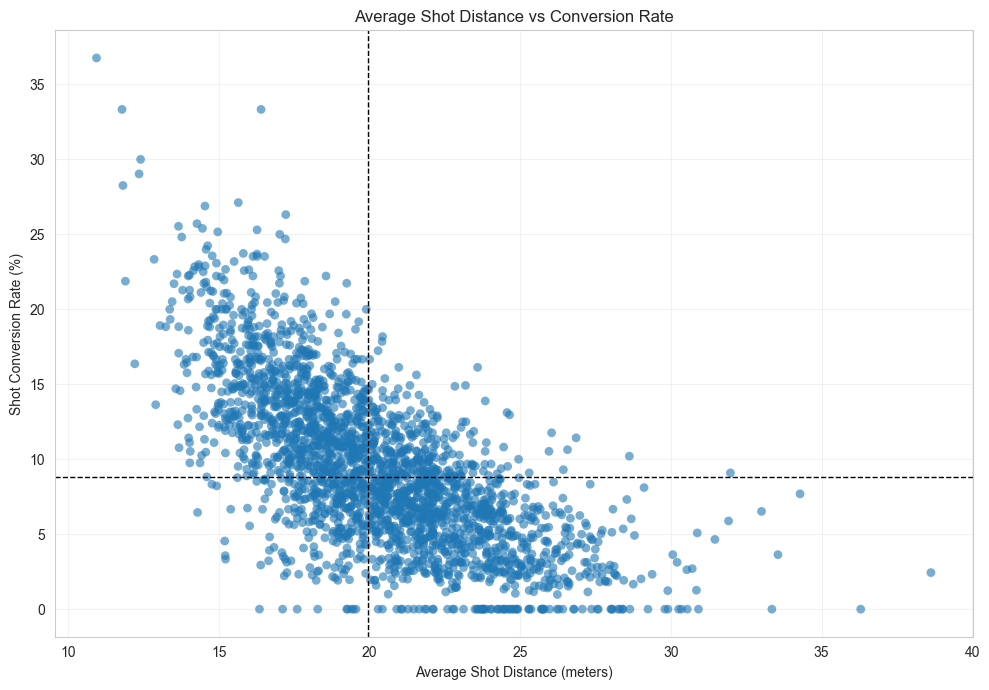

In [ ]:
# --------------------------------------------------
# 1. Aggregate per player
# --------------------------------------------------
df_players = (
    df
    .group_by("player")
    .agg([
        pl.len().alias("shots"),
        pl.col("distance_meters").mean().alias("avg_distance"),
        pl.col("is_goal").mean().alias("conversion_rate"),
    ])
    .filter(pl.col("shots") >= 30)   # optional: stability filter
)

# --------------------------------------------------
# 2. Compute medians
# --------------------------------------------------
medians = df_players.select([
    pl.col("avg_distance").median().alias("med_dist"),
    (pl.col("conversion_rate") * 100).median().alias("med_conv"),
]).to_dicts()[0]

med_dist = medians["med_dist"]
med_conv = medians["med_conv"]

# --------------------------------------------------
# 3. Convert once for plotting
# --------------------------------------------------
pdf = df_players.with_columns(
    (pl.col("conversion_rate") * 100).alias("conversion_rate_pct")
).to_pandas()

# --------------------------------------------------
# 4. Scatter plot
# --------------------------------------------------
plt.figure(figsize=(10, 7))

plt.scatter(
    pdf["avg_distance"],
    pdf["conversion_rate_pct"],
    alpha=0.6,
    s=40,
    edgecolor="none"
)

# median lines
plt.axvline(med_dist, color="black", linestyle="--", linewidth=1)
plt.axhline(med_conv, color="black", linestyle="--", linewidth=1)

# labels & styling
plt.xlabel("Average Shot Distance (meters)")
plt.ylabel("Shot Conversion Rate (%)")
plt.title("Average Shot Distance vs Conversion Rate")
plt.grid(alpha=0.25)
plt.tight_layout()

plt.show()


In [ ]:
(
    df_players
    .filter(pl.col("player") == "Xabi Alonso")
)

player,shots,avg_distance,conversion_rate
str,u32,f64,f64
"""Xabi Alonso""",33,31.976968,0.090909
